## 60. 単語ベクトルの読み込みと表示

In [1]:
#インポート
from gensim.models import KeyedVectors

In [2]:
#モデルを作る
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

In [5]:
#'United States'の単語ベクトルを表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

In [6]:
#'United States'と'U.S.'の類似度を求める
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件

In [9]:
#'United States'と類似度の高い単語の上位10個を表示する
model.most_similar('United_States',topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310773730278015),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63. 加法構成性によるアナロジー

In [10]:
vec = model['Spain'] - model['Madrid'] + model['Athens']

In [11]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400863289833069),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]

## 64. アナロジーデータでの実験

In [15]:
with open('questions-words.txt', 'r') as f1, open('questions-words-add.txt', 'w') as f2:
  for line in f1:
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

## 65. アナロジータスクでの正解率

In [20]:
import re
with open('questions-words-add.txt','r') as f:
    sem_cnt = 0
    sem_cor = 0
    
    syn_cnt = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if re.search(r'gram',line[0]):
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1
        else:
            sem_cnt += 1
            if line[4] == line[5]:
                sem_cor += 1

In [21]:
print('意味的アナロジーの正解率: '+str(sem_cor/sem_cnt))
print('文法的アナロジーの正解率: '+str(syn_cor/syn_cnt))

意味的アナロジーの正解率0.7308602999210734
文法的アナロジーの正解率0.7400468384074942


## 66. WordSimilarity-353での評価

In [3]:
import numpy as np

In [27]:
sim353 = []
with open('combined.csv','r') as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        sim353.append(line)

In [29]:
from scipy.stats import spearmanr

In [30]:
correlation, pvalue = spearmanr(np.array(sim353).T[2], np.array(sim353).T[3])
print('スピアマン相関係数:',correlation)

スピアマン相関係数: 0.6849564489532377


In [5]:
countries = {}
with open('questions-words-add.txt','r') as f:
    for line in f:
        line = line.split()
        if line[0] in ['capital-common-countries','capital-world']:
            countries.setdefault(line[2])
        elif line[0] in ['currency','gram6-nationality-adjective']:
            countries.setdefault(line[1])
            
countries = list(countries)
countries_vec = [model[country] for country in countries]

## 67. k-meansクラスタリング

In [5]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=5,random_state=56)
kmeans.fit(countries_vec)

KMeans(n_clusters=5, random_state=56)

In [9]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Greece, Russia, Turkey, Turkmenistan, Kazakhstan, Azerbaijan, Serbia, Kyrgyzstan, Slovakia, Romania, Hungary, Moldova, Tajikistan, Ukraine, Slovenia, Belarus, Cyprus, Montenegro, Latvia, Macedonia, Bulgaria, Estonia, Uzbekistan, Georgia, Albania, Malta, Lithuania, Poland, Armenia, Croatia
cluster 1
Egypt, Nigeria, Ghana, Algeria, Madagascar, Eritrea, Mali, Gambia, Burundi, Guinea, Senegal, Botswana, Zimbabwe, Uganda, Sudan, Rwanda, Gabon, Malawi, Angola, Zambia, Mozambique, Somalia, Liberia, Kenya, Niger, Mauritania, Morocco, Libya, Tunisia, Namibia
cluster 2
Iraq, Thailand, China, Australia, Vietnam, Pakistan, Afghanistan, Iran, Japan, Jordan, Samoa, Lebanon, Syria, Bangladesh, Qatar, Tuvalu, Indonesia, Nepal, Bahrain, Philippines, Oman, Fiji, Taiwan, Bhutan, Laos, Cambodia, India, Korea, Malaysia, Israel
cluster 3
Germany, Switzerland, Finland, England, Spain, Norway, Canada, France, Italy, Sweden, Belgium, Denmark, Ireland, Portugal, Uruguay, Greenland, Liechtenstein, Aust

## 68. Ward法によるクラスタリング

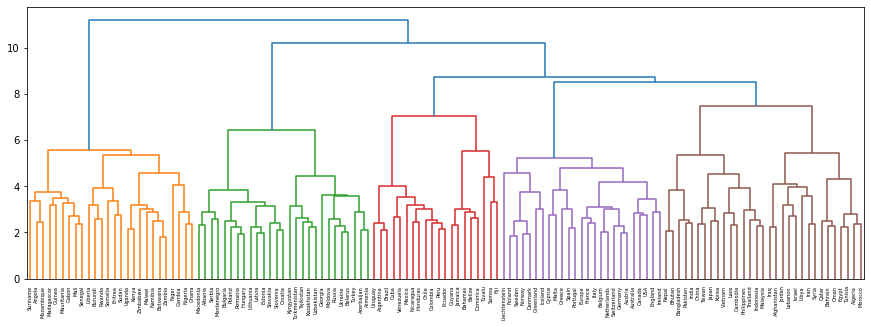

In [6]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化

In [7]:
from sklearn.manifold import TSNE

In [8]:
X_reduced = TSNE(n_components=2, random_state=56).fit_transform(countries_vec)

(129, 2)

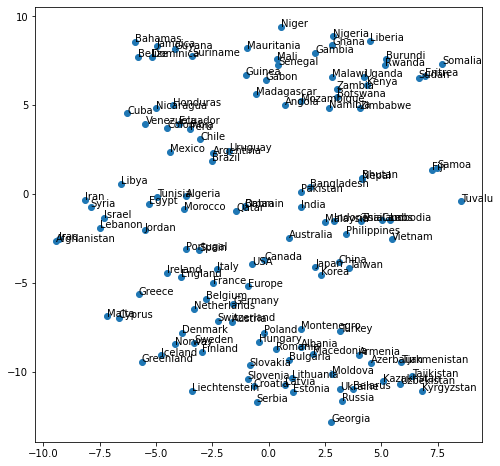

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for (x, y), name in zip(X_reduced, countries):
    plt.annotate(name, (x, y))
plt.show()